In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\debjo\Downloads\compressed_data.csv\compressed_data.csv", low_memory=False)


In [4]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


Check the column names in the Dataset

In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

Check for Missing Values

In [8]:
# 'df' is a pandas DataFrame that may contain missing values (NaN).

# df.isnull() returns a DataFrame of the same shape as 'df',
# where each cell is True if the original value is missing (NaN), otherwise False.

# .sum() is applied to this boolean DataFrame.
# In Python, True is treated as 1 and False as 0, so summing gives the count of True values.
# By default, sum() works column-wise, so we get the total number of missing values in each column.

# print(...) displays the result — a Series showing how many missing values are in each column.
print(df.isnull().sum())


id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

Handle Missing Values

This code ensures that the 'last review' column is properly formatted as datetime, missing values in key columns are appropriately handled, and incomplete records are removed, preparing the dataset for further analysis or visualization.

In [6]:

import pandas as pd

# Read CSV with safe path and options
df = pd.read_csv(
    r"C:\Users\debjo\Downloads\compressed_data.csv\compressed_data.csv",
    low_memory=False
)

# Convert 'last review' to datetime, coercing errors (invalid dates become NaT)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Fill missing 'reviews per month' with 0
df['reviews per month'].fillna(0, inplace=True)

# Fill missing 'last review' with the earliest valid date
min_review_date = df['last review'].min()
df['last review'].fillna(min_review_date, inplace=True)

# Drop rows with missing 'NAME' or 'host name'
df.dropna(subset=['NAME', 'host name'], inplace=True)

# Optional: Check missing values now
print(df.isnull().sum())


id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

Correct Data Types

In [7]:
# Remove dollar signs and convert to float
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[$,]', '', regex=True).astype(float)

Remove Duplicates

In [8]:
df.drop_duplicates(inplace=True)

Confirm Data Cleaning

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101410 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object 

In [10]:
# 'df' is a pandas DataFrame from which we want to drop specific columns.

# df.drop(...) is used to remove specified rows or columns from a DataFrame.

# columns=["license", "house_rules"] tells pandas that we want to drop these two columns.

# errors='ignore' means:
# - If any of the specified columns ("license" or "house_rules") are not present in the DataFrame,
# - then pandas will NOT raise an error.
# - Instead, it will just skip those columns and continue.

# The result of df.drop(...) is a new DataFrame with the specified columns removed.
# We assign it back to 'df' to update the original DataFrame.

df = df.drop(columns=["license", "house_rules"], errors='ignore')

In [32]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,696.0,NaN,7.0,12.0,2019-03-27,0.44,5.0,1.0,0.0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,909.0,NaN,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,387.0,NaN,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,848.0,NaN,2.0,0.0,2012-07-11,0.00,1.0,1.0,0.0


Descriptive Statistics

In [11]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,1.163207,3.278558,7.948463,141.164660
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,1.683708,1.285369,32.328974,135.419199
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


Visualization

Distribution of Prices

Distribution of Prices

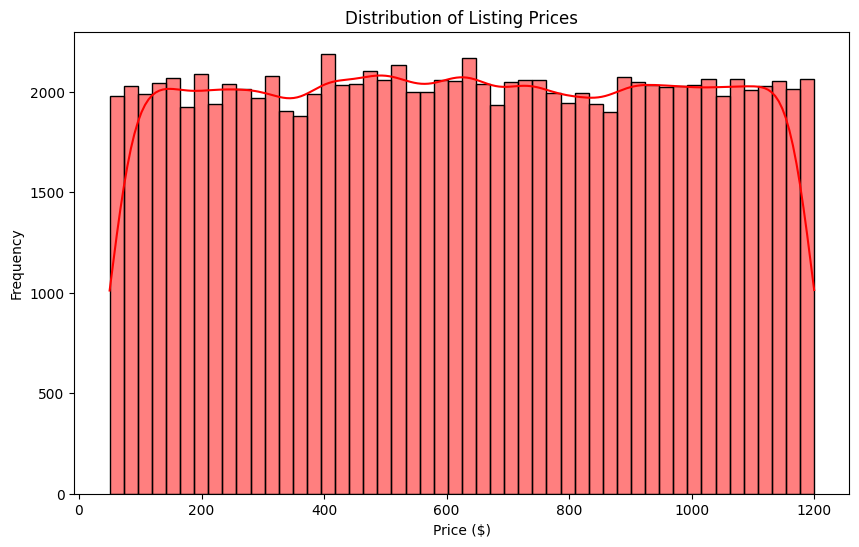

In [34]:
# Importing the 'pyplot' module from the 'matplotlib' library and giving it the alias 'plt'
# This is used for creating plots and visualizations.
import matplotlib.pyplot as plt  

# Importing the 'seaborn' library and giving it the alias 'sns'
# Seaborn is built on top of matplotlib and provides easier and more attractive statistical plots.
import seaborn as sns  

# Creating a new figure with a specific size (width=10 inches, height=6 inches)
plt.figure(figsize=(10, 6))  

# Creating a histogram of the 'price' column from the DataFrame 'df' using seaborn
# bins=50 means we divide the range of prices into 50 intervals (bars)
# kde=True adds a smooth Kernel Density Estimate line on top of the histogram for better understanding of distribution shape
# color='red' sets the color of the histogram bars to red
sns.histplot(df['price'], bins=50, kde=True, color='red')  

# Setting the title of the plot
plt.title('Distribution of Listing Prices')  

# Labeling the x-axis as 'Price ($)'
plt.xlabel('Price ($)')  

# Labeling the y-axis as 'Frequency'
plt.ylabel('Frequency')  

# Displaying the plot on the screen
plt.show()  


The histogram shows a fairly even distribution of listing prices across different price ranges, indicating no particular concentration of listings in any specific price range. The KDE line helps visualize this even spread more clearly, confirming that the dataset contains listings with a wide variety of prices.

Room Type Analysis

Analyze the distribution of different room types.

plt.figure(figsize=(8, 5))
sns.countplot(x='room type', data=df, color='hotpink')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

The count plot shows a clear distribution of the different room types available in the Airbnb dataset. The majority of listings are for 'Entire home/apt' and 'Private room', with 'Shared room' and 'Hotel room' being much less common. This insight can be useful for understanding the availability and popularity of different types of accommodations on Airbnb.

Neighborhood Analysis

Examine how listings are distributed across different neighborhoods.

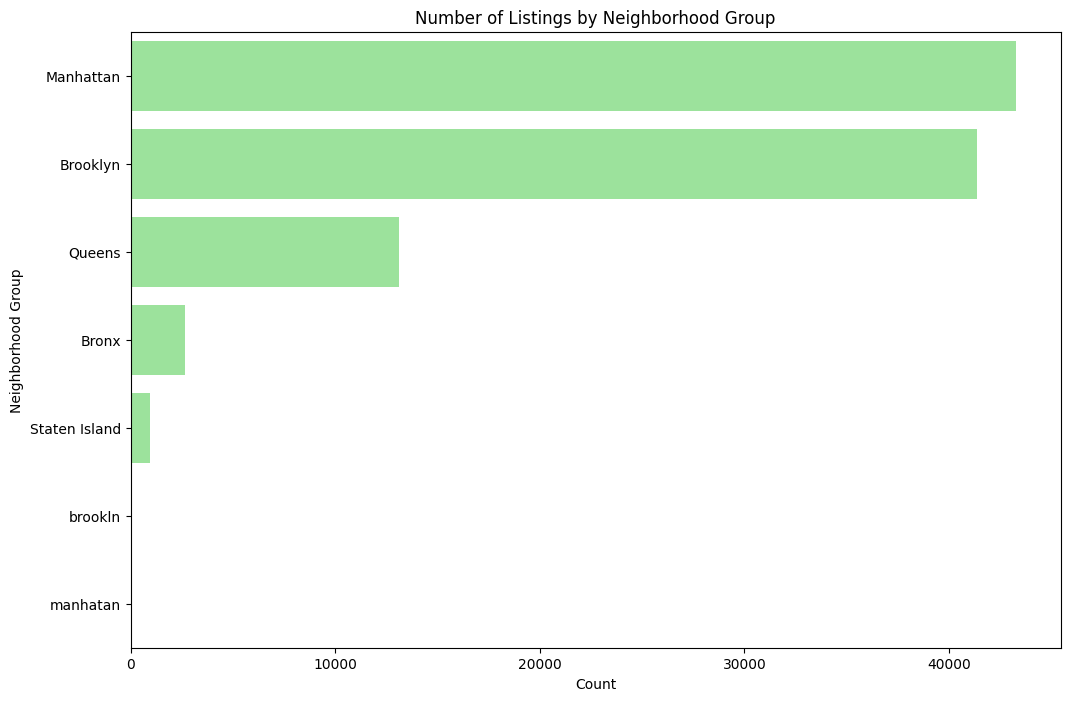

In [35]:
# Create a new figure for the plot with a width of 12 inches and a height of 8 inches.
plt.figure(figsize=(12, 8))  

# Create a horizontal count plot using seaborn.
# y='neighbourhood group' → The y-axis will represent unique values in the 'neighbourhood group' column.
# data=df → Use the DataFrame 'df' as the source of data.
# color="lightgreen" → Set the color of the bars to light green.
# order=... → Sort the bars in descending order based on count using value_counts().index.
sns.countplot(
    y='neighbourhood group',
    data=df,
    color="lightgreen",
    order=df['neighbourhood group'].value_counts().index
)  

# Set the title of the plot.
plt.title('Number of Listings by Neighborhood Group')  

# Label the x-axis as 'Count' (which shows number of listings).
plt.xlabel('Count')  

# Label the y-axis as 'Neighborhood Group'.
plt.ylabel('Neighborhood Group')  

# Display the final plot.
plt.show()  


The count plot shows a clear distribution of the number of listings across different neighborhood groups. Manhattan and Brooklyn dominate the listings, suggesting they are prime locations for Airbnb. Queens, Bronx, and Staten Island have fewer listings, indicating less availability or popularity.

Price vs. Room Type

Visualize the relationship between price and room type

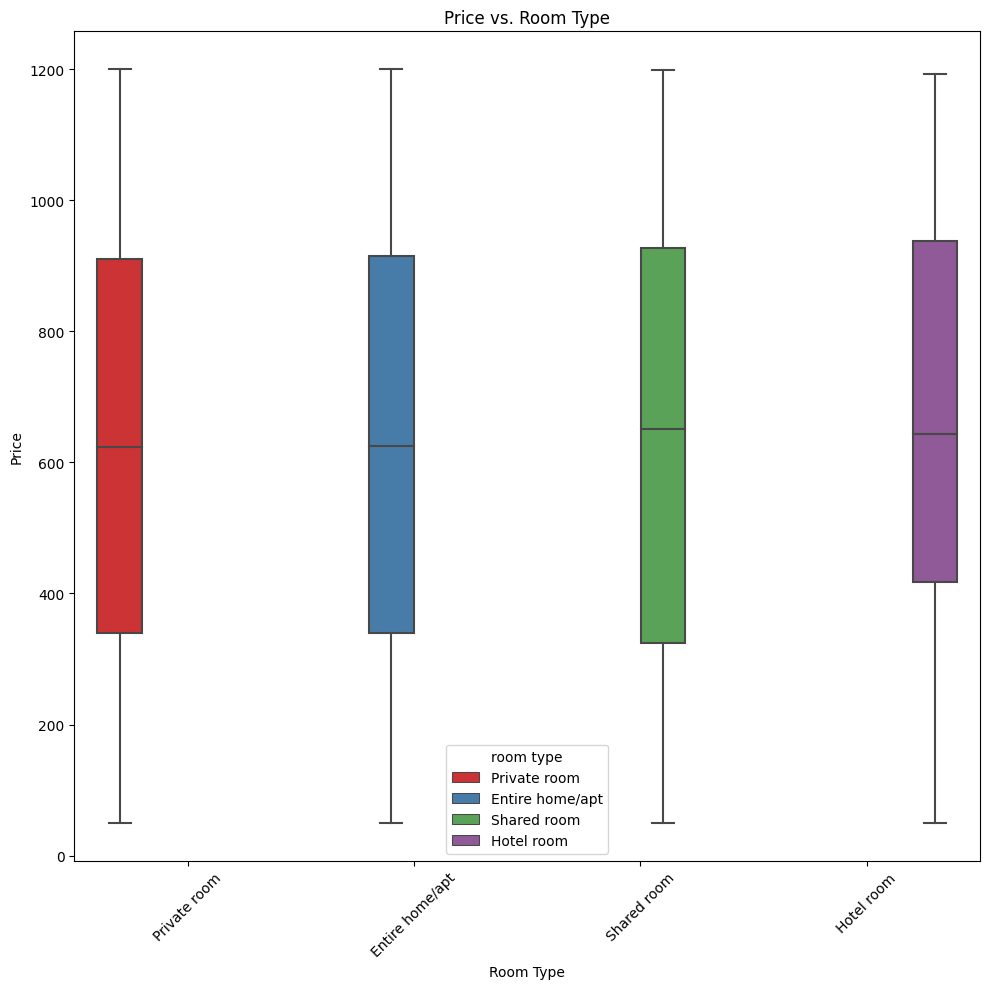

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure 'price' is numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Step 2: Drop rows with missing 'price' or 'room type'
df = df.dropna(subset=['price', 'room type'])

# Step 3: Confirm 'room type' is categorical (optional)
df['room type'] = df['room type'].astype(str)

# Step 4: Plot safely
plt.figure(figsize=(10, 10))
sns.boxplot(x='room type', y='price', hue='room type', data=df, palette='Set1')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Price vs. Room Type  
The box plot provides a detailed view  
of how prices vary across different room types  
in the Airbnb dataset. It shows that while  
'Shared room' tends to have lower prices, 'Private room',  
'Entire home/apt', and 'Hotel room' have higher and more varied price ranges.  
This visualization helps in understanding the pricing  
dynamics for different types of accommodations on Airbnb.

In [30]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


Reviews Over Time

Plot the number of reviews over time.

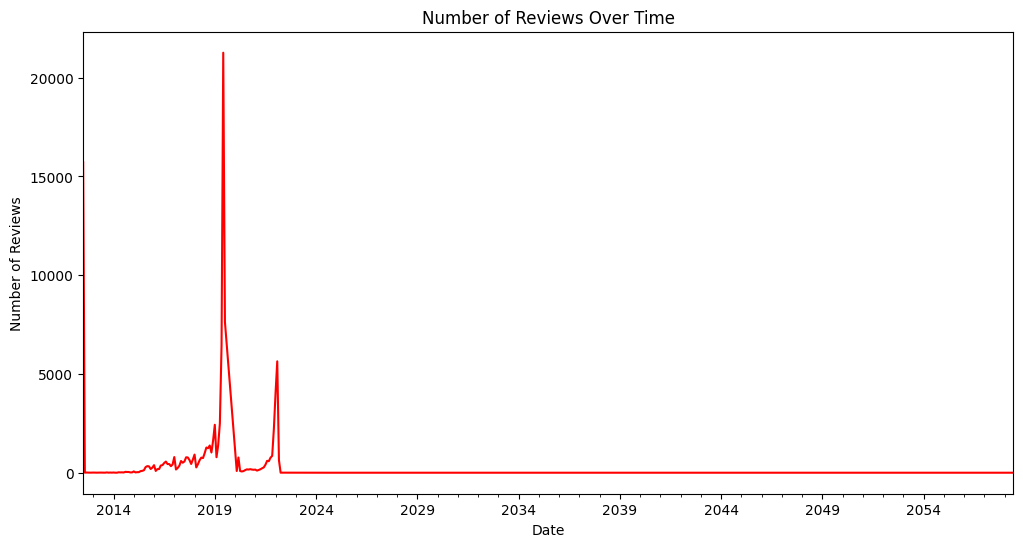

In [33]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line', color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

The line plot provides a clear visualization  
of the number of reviews over time.  
It helps identify trends and patterns in review activity,  
such as periods of high or low activity.  
This information can be useful for understanding  
the dynamics of user engagement and the popularity  
of Airbnb listings over time. The significant spikes  
and drops in reviews might be worth further investigation  
to understand the underlying causes, such as changes  
in Airbnb policies, market conditions, or external events.